In [1]:
##ЛАБОРАТОРНАЯ РАБОТА №8. ВЫБОР И ИССЛЕДОВАНИЕ ОПТИМАЛЬНОГО БЫСТРОДЕЙСТВИЯ ПРОЦЕССОРА ЦУС


In [1]:
#Ввод данных
n = 3
print("Введите значения betta0, w*, nue*, Л, tetta, tetta(2)")

print("Введите значение betta0");
betta0 = float(input())

print("Введите значение w*")
w = float(input())

print("Введите значение nue*")
nue = float(input())

print("Введите значение Л")
lambdas = []
lambdas.insert(0, float(input()))
lambdas.insert(1, float(input()))
lambdas.insert(2, float(input()))

print("Введите значение tetta")
tettas1 = []
tettas1.insert(0, float(input()))
tettas1.insert(1, float(input()))
tettas1.insert(2, float(input()))

print("Введите значение tetta(2)")
tettas2 = []
tettas2.insert(0, float(input()))
tettas2.insert(1, float(input()))
tettas2.insert(2, float(input()))

Введите значения betta0, w*, nue*, Л, tetta, tetta(2)
Введите значение betta0
6
Введите значение w*
2
Введите значение nue*
0.2
Введите значение Л
2
2
1
Введите значение tetta
2
3
2
Введите значение tetta(2)
5
10
6


In [2]:
#Вычисление r, r1, lambda
r = 0
for i in range(n):
    r += lambdas[i]*tettas1[i]

print("r = ", r)

r1 = 0
for i in range(n):
    r1 += lambdas[i]*tettas2[i]

print("r1 = ", r1)

lambda1 = 0
for i in range(n):
    lambda1 += lambdas[i]
print("lambda = ", lambda1)
        

r =  12.0
r1 =  36.0
lambda =  5.0


In [3]:
#Вычисление B1 и B2
import math

B1 = r/(1-nue)
print(B1)

B2 = r/2 + math.sqrt( pow(r, 2)/4 + r1/(2*w) )
print(B2)

15.0
12.70820393249937


In [5]:
#B0
alfas = range(0, 10)


def findB0(b1,b2): 
    if B1 < B2:
        print("РЕШЕНИЙ НЕТ! Дальнейшие шаги не имеют смысла")
        return
    print("Решения есть")
    B0 = []
    for alfa in alfas:
        middleCalculation = alfa*lambda1*r1;
        B0.insert(alfa, r + 1/(2*r) * (middleCalculation + math.sqrt(middleCalculation * (2*pow(r, 2) + middleCalculation)) ))
    return B0

B0_list = findB0(B1, B2)
print(B0_list)



Решения есть
[12.0, 31.593386622447824, 47.124611797498105, 62.36126343151006, 77.4964786985977, 92.58421984903521, 107.6458290484024, 122.69149422381247, 137.72670690061992, 152.75469268244868]


In [23]:
#C

def calcC(b, alfa):
    return betta0 * ((1 - r/b) + (alfa*lambda1*r1)/(2*b * (b-r)))

def CminFind():
    cmin = []
    for i, b0 in enumerate(B0_list):
        tempB0 = b0
        if B2 <= tempB0 and tempB0 <= B1:
            cmin.insert(i, calcC(tempB0, i))
            continue
            
        cb1 = calcC(B1, i)
        cb2 = calcC(B2, i)
        if cb2 <= cb1:
            tempB0 = B2
        else:
            tempB0 = B1
            
        cmin.insert(i, calcC(tempB0,i ))
    return cmin

cmin_list = CminFind()
print(cmin_list)
#
#clist = []
#for i, b0 in enumerate(B0_list):
#    clist.insert(i, calcC(b0,i))
#return clist
#
#print(clist)
    
            

[0.33436854000504734, 13.200000000000001, 25.200000000000003, 37.2, 49.199999999999996, 61.199999999999996, 73.19999999999999, 85.19999999999999, 97.19999999999999, 109.19999999999999]


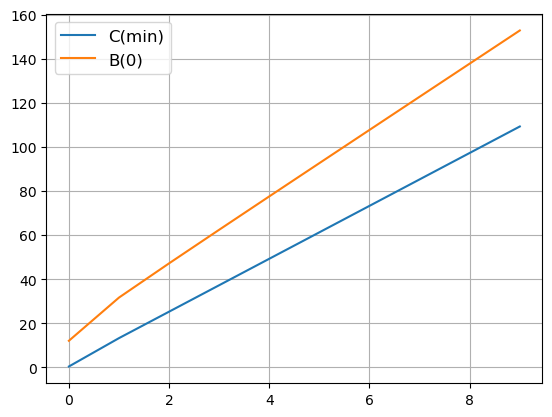

In [37]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(0, 10, 0.01)
plt.plot(cmin_list, label='C(min)')
plt.plot(B0_list, label='B(0)')
plt.grid(True)
plt.legend(loc='best', fontsize=12)
plt.show()

